In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from plotnine import *

In [2]:
%ls data/traffic_accident

2016_무단횡단사고다발지.csv
2016년_보행어린이사고다발지.csv
2016년_스쿨존내어린이사고다발지.csv
도로교통공단_전국_사망교통사고_2017.csv


In [3]:
pedestrian = pd.read_csv('data/traffic_accident/2016_무단횡단사고다발지.csv', encoding='euc-kr')
pedestrian.shape

(204, 15)

In [4]:
pedestrian.head()

,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6345678,2017081,1141011800,110811001,서울 서울서대문1,서울특별시 서대문구 홍은동(명지대입구 부근),9,10,0,5,3,2,126.926633,37.580562,"{""type"":""Polygon"",""coordinates"":[[[126.8357475..."
1,6345672,2017081,1141012000,110811003,서울 서울서대문3,서울특별시 서대문구 남가좌동(가좌동광교회 부근),5,5,0,1,4,0,126.923365,37.577264,"{""type"":""Polygon"",""coordinates"":[[[126.9111590..."
2,6345679,2017081,1144010400,111511001,서울 서울마포1,서울특별시 마포구 도화동(진도빌딩 부근),7,8,0,2,6,0,126.947766,37.540450,"{""type"":""Polygon"",""coordinates"":[[[128.9866759..."
3,6345478,2017081,1144012100,111511002,서울 서울마포2,서울특별시 마포구 동교동(청원제일주유소 부근),5,5,0,0,4,1,126.922843,37.556245,"{""type"":""Polygon"",""coordinates"":[[[126.6712885..."
4,6345528,2017081,1147010200,112911002,서울 서울양천2,서울특별시 양천구 목동(목동사거리 부근),7,7,1,1,5,0,126.863526,37.532372,"{""type"":""Polygon"",""coordinates"":[[[129.0659134..."


In [5]:
pedestrian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
다발지식별자      204 non-null int64
다발지그룹식별자    204 non-null int64
법정동코드       204 non-null int64
스팟코드        204 non-null int64
관할경찰서       204 non-null object
다발지명        204 non-null object
발생건수        204 non-null int64
사상자수        204 non-null int64
사망자수        204 non-null int64
중상자수        204 non-null int64
경상자수        204 non-null int64
부상신고자수      204 non-null int64
경도          204 non-null float64
위도          204 non-null float64
다발지역폴리곤     204 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 24.0+ KB


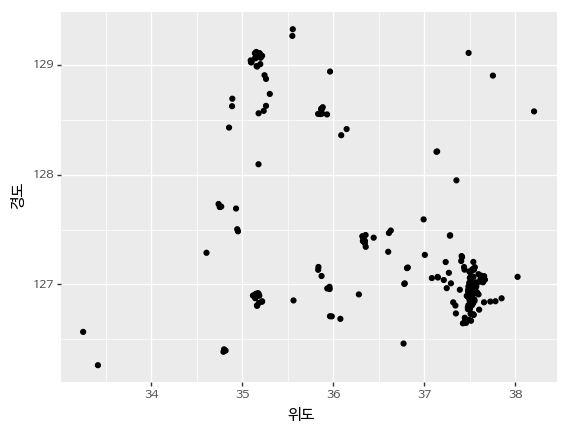

<ggplot: (-9223372036565054874)>

In [6]:
(ggplot(pedestrian)
 + aes(x='위도', y='경도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [7]:
print(pedestrian.shape)
pedestrian['시도'] = pedestrian['다발지명'].str.split(' ', expand=True)[0]
pedestrian['구군'] = pedestrian['다발지명'].str.split(' ', expand=True)[1]
print(pedestrian.shape)
pedestrian.head()

(204, 15)
(204, 17)


,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,시도,구군
0,6345678,2017081,1141011800,110811001,서울 서울서대문1,서울특별시 서대문구 홍은동(명지대입구 부근),9,10,0,5,3,2,126.926633,37.580562,"{""type"":""Polygon"",""coordinates"":[[[126.8357475...",서울특별시,서대문구
1,6345672,2017081,1141012000,110811003,서울 서울서대문3,서울특별시 서대문구 남가좌동(가좌동광교회 부근),5,5,0,1,4,0,126.923365,37.577264,"{""type"":""Polygon"",""coordinates"":[[[126.9111590...",서울특별시,서대문구
2,6345679,2017081,1144010400,111511001,서울 서울마포1,서울특별시 마포구 도화동(진도빌딩 부근),7,8,0,2,6,0,126.947766,37.540450,"{""type"":""Polygon"",""coordinates"":[[[128.9866759...",서울특별시,마포구
3,6345478,2017081,1144012100,111511002,서울 서울마포2,서울특별시 마포구 동교동(청원제일주유소 부근),5,5,0,0,4,1,126.922843,37.556245,"{""type"":""Polygon"",""coordinates"":[[[126.6712885...",서울특별시,마포구
4,6345528,2017081,1147010200,112911002,서울 서울양천2,서울특별시 양천구 목동(목동사거리 부근),7,7,1,1,5,0,126.863526,37.532372,"{""type"":""Polygon"",""coordinates"":[[[129.0659134...",서울특별시,양천구


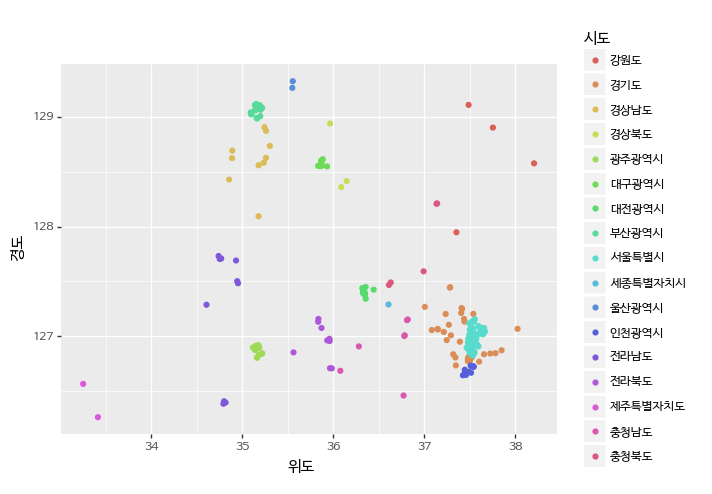

<ggplot: (-9223372036565044059)>

In [8]:
(ggplot(pedestrian)
 + aes(x='위도', y='경도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [9]:
pedestrian['type'] = 'pedestrian'

In [10]:
pedestrian.head()

,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,시도,구군,type
0,6345678,2017081,1141011800,110811001,서울 서울서대문1,서울특별시 서대문구 홍은동(명지대입구 부근),9,10,0,5,3,2,126.926633,37.580562,"{""type"":""Polygon"",""coordinates"":[[[126.8357475...",서울특별시,서대문구,pedestrian
1,6345672,2017081,1141012000,110811003,서울 서울서대문3,서울특별시 서대문구 남가좌동(가좌동광교회 부근),5,5,0,1,4,0,126.923365,37.577264,"{""type"":""Polygon"",""coordinates"":[[[126.9111590...",서울특별시,서대문구,pedestrian
2,6345679,2017081,1144010400,111511001,서울 서울마포1,서울특별시 마포구 도화동(진도빌딩 부근),7,8,0,2,6,0,126.947766,37.540450,"{""type"":""Polygon"",""coordinates"":[[[128.9866759...",서울특별시,마포구,pedestrian
3,6345478,2017081,1144012100,111511002,서울 서울마포2,서울특별시 마포구 동교동(청원제일주유소 부근),5,5,0,0,4,1,126.922843,37.556245,"{""type"":""Polygon"",""coordinates"":[[[126.6712885...",서울특별시,마포구,pedestrian
4,6345528,2017081,1147010200,112911002,서울 서울양천2,서울특별시 양천구 목동(목동사거리 부근),7,7,1,1,5,0,126.863526,37.532372,"{""type"":""Polygon"",""coordinates"":[[[129.0659134...",서울특별시,양천구,pedestrian


In [11]:
df_columns = pedestrian.columns
df_columns

Index(['다발지식별자', '다발지그룹식별자', '법정동코드', '스팟코드', '관할경찰서', '다발지명', '발생건수', '사상자수',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도', '다발지역폴리곤', '시도', '구군',
       'type'],
      dtype='object')

In [17]:
child = pd.read_csv('data/traffic_accident/2016년_보행어린이사고다발지.csv', encoding='euc-kr', names=df_columns, header=None)
child.shape

(92, 18)

In [19]:
child.head(3)

,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,시도,구군,type
0,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,NaN,NaN,NaN
1,6233904,2017027,4825010700,48250002,경상남도 김해시2,경상남도 김해시 삼계동(화정마을4단지 아아파크가야아파트 부근),3,3,0,1,2,0,128.869236159322,35.26685710807,"{""type"":""Polygon""",coordinates:[[[128.87143443354415,35.266832206391761],[128.87142341966893
2,6231366,2017027,4825012500,48250001,경상남도 김해시1,경상남도 김해시 장유면(장구공원 부근),3,3,0,2,1,0,128.802142897278,35.2036501304501,"{""type"":""Polygon""",coordinates:[[[128.80433952606944,35.203626485112331],[128.80432865389074


In [20]:
child = child.drop(child.index[[0]])
child.head(3)

,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,시도,구군,type
1,6233904,2017027,4825010700,48250002,경상남도 김해시2,경상남도 김해시 삼계동(화정마을4단지 아아파크가야아파트 부근),3,3,0,1,2,0,128.869236159322,35.26685710807,"{""type"":""Polygon""",coordinates:[[[128.87143443354415,35.266832206391761],[128.87142341966893
2,6231366,2017027,4825012500,48250001,경상남도 김해시1,경상남도 김해시 장유면(장구공원 부근),3,3,0,2,1,0,128.802142897278,35.2036501304501,"{""type"":""Polygon""",coordinates:[[[128.80433952606944,35.203626485112331],[128.80432865389074
3,6233597,2017027,4719010900,47190001,경상북도 구미시1,경상북도 구미시 형곡동(형곡중앙시장 부근),3,3,0,1,2,0,128.335991254094,36.1067716179167,"{""type"":""Polygon""",coordinates:[[[128.33821309088188,36.106756093706942],[128.33820296614698


In [22]:
child['type'] = 'child'

In [23]:
print(child.shape)
child['시도'] = child['다발지명'].str.split(' ', expand=True)[0]
child['구군'] = child['다발지명'].str.split(' ', expand=True)[1]
print(child.shape)
child.head()

(91, 18)
(91, 18)


,다발지식별자,다발지그룹식별자,법정동코드,스팟코드,관할경찰서,다발지명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,시도,구군,type
1,6233904,2017027,4825010700,48250002,경상남도 김해시2,경상남도 김해시 삼계동(화정마을4단지 아아파크가야아파트 부근),3,3,0,1,2,0,128.869236159322,35.26685710807,"{""type"":""Polygon""",경상남도,김해시,child
2,6231366,2017027,4825012500,48250001,경상남도 김해시1,경상남도 김해시 장유면(장구공원 부근),3,3,0,2,1,0,128.802142897278,35.2036501304501,"{""type"":""Polygon""",경상남도,김해시,child
3,6233597,2017027,4719010900,47190001,경상북도 구미시1,경상북도 구미시 형곡동(형곡중앙시장 부근),3,3,0,1,2,0,128.335991254094,36.1067716179167,"{""type"":""Polygon""",경상북도,구미시,child
4,6233268,2017027,4719011700,47190002,경상북도 구미시2,경상북도 구미시 임은동(한울공원 부근),3,3,0,0,3,0,128.35812156416,36.0878502660778,"{""type"":""Polygon""",경상북도,구미시,child
5,6233905,2017027,5011010200,50110002,제주특별자치도 제주시2,제주특별자치도 제주시 일도이동(영도제나빌 부근),4,4,0,0,4,0,126.541264474777,33.5051828924774,"{""type"":""Polygon""",제주특별자치도,제주시,child


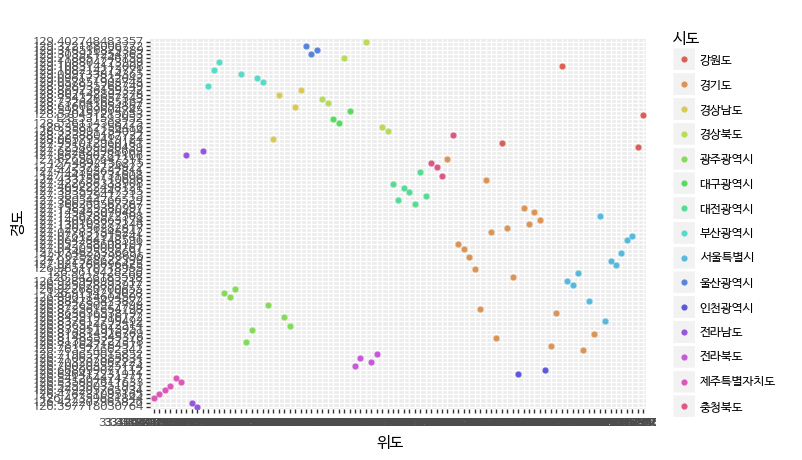

<ggplot: (292555065)>

In [36]:
(ggplot(child)
 + aes(x='위도', y='경도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [35]:
df = pd.merge(pedestrian, child, how='outer')
df.shape

(295, 18)

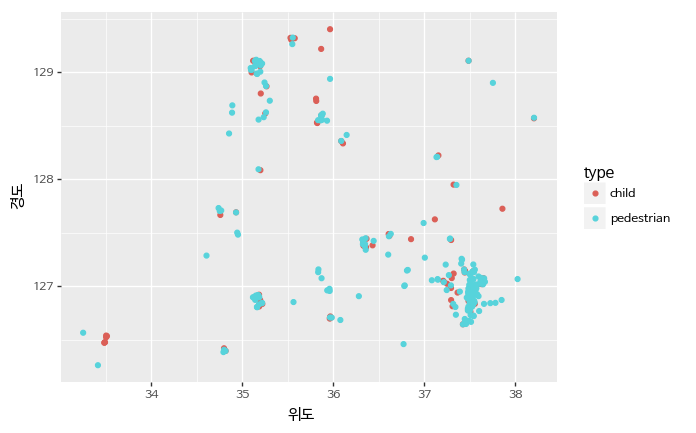

<ggplot: (-9223372036561773280)>

In [40]:
(ggplot(df)
 + aes(x='위도', y='경도', color='type')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)